In [1]:
from ImageData import ScanAssets
a = ScanAssets("../images/")
a.do(None)

Skipping non image file: ../images/IDIAP/test.txt for class IDIAP


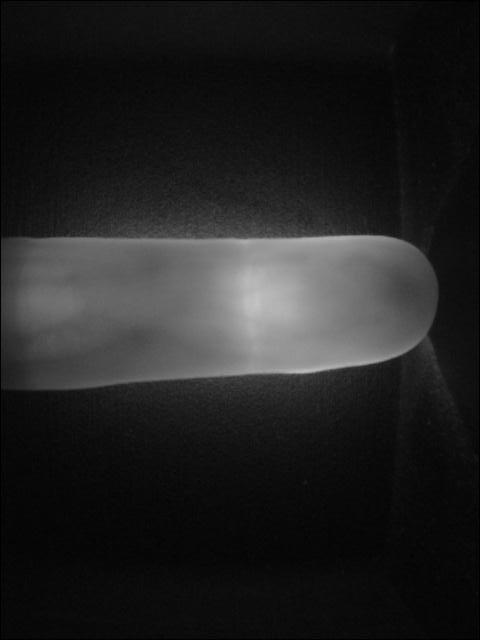

In [3]:
a.data[212].data[0]

In [2]:
import numpy as np
opencvImage = np.array(a.data[212].data[0])

In [5]:
import cv2
ret, threshed_img = cv2.threshold(opencvImage, 40, 255, cv2.THRESH_BINARY)

In [6]:
 contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [12]:
import math
maxarea = 0
max2 = 0

#cv2.cvtColor(img, cv2.COLOR_GRAY2RGB, img)

(imWidth, imHeight) = opencvImage.shape
imArea = imWidth * imHeight

#framemax
print("Contours: "+str(len(contours)))
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    # draw a green rectangle to visualize the bounding rect
    cv2.rectangle(opencvImage, (x, y), (x+w, y+h), (255, 255, 255), 2)
    area = w * h
    print (area)
    if area > maxarea:
        max2 = maxarea
        maxarea = area
        framemax = (x,y, w, h)
    elif area > max2:
        max2 = area
        frame2 = (x, y, w, h)

threshold = 0.05
spaceA = (1.0 / imArea * maxarea)
spaceB = (1.0 / imArea * max2)
if spaceA >= threshold:
    frame2 = framemax
    print("Framemax has"+str(spaceA)+" percent space!")
elif spaceB >= threshold:
    framemax = frame2
    print("Frame2 has"+str(spaceB)+" percent space!")

if framemax[1] > frame2[1]:
    uborder = cv2.line(opencvImage, (framemax[0], framemax[1]+framemax[3]), (framemax[0]+framemax[2], framemax[1]+framemax[3]), (255, 0, 0), 1)
    oborder = cv2.line(opencvImage, (frame2[0], frame2[1]),(frame2[0]+frame2[2], frame2[1]), (255, 0, 0), 1)

size = opencvImage.shape

cropX = 0
cropWidth = size[1]
cropY = frame2[1]
cropHeight = 0 + (framemax[1]+framemax[3])

if cropY >= imHeight:
    print("Fehler 1")
if cropHeight >= imHeight:
    print("Fehler 2")
if cropWidth >= imWidth:
    #cropWidth = imWidth - 1
    print("Fehler 3! KORRIGIERT")

crop_img = opencvImage[cropY : cropHeight, cropX : cropWidth]

partHeight, partWidth = crop_img.shape
part_img = crop_img[math.floor(partHeight * 0.20): math.floor(partHeight * 0.85), math.floor(partWidth * 0.15): math.floor(partWidth * 0.80)]

Contours: 202
1
6
1
1
1
1
2
4
1
12
4
6
1
1
1
2
6
2
9
6
4
1
12
1
2
4
4
1
9
2
8
1
28
10
30
9
3
5
1
2
2
1
4
2
4
1
1
2
4
4
2
4
1
2
6
15
1
1
2
6
12
9
1
1
1
4
8
2
12
4
8
6
5
48
3
6
9
1
1
2
21
3
2
3
12
4
6
9
2
90434
20
9
15
12
30
9
12
12
12
15
20
12
9
9
9
12
9
9
9
25
12
12
9
30
30
9
9
15
16
20
12
12
12
24
24
36
54
12
9
16
9
24
15
15
12
9
12
12
36
20
16
9
16
12
45
24
9
12
25
20
9
9
25
9
9
9
9
12
15
9
9
9
15
12
25
25
24
48
12
20
18
24
15
9
16
12
12
25
20
9
24
9
15
35
9
16
49
35
12
63
2
1
6
3
12
1
2
2
4
1
1
1
Framemax has0.29438151041666666 percent space!


In [15]:
from PIL import Image

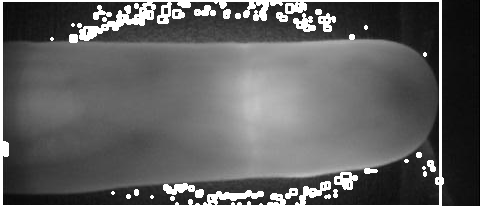

In [16]:
plt = Image.fromarray(crop_img)
plt

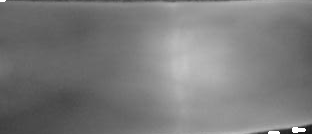

In [17]:
plt = Image.fromarray(part_img)
plt